# Mod2 Project - Linear Regression Model

Second Notebook

## Data Analysis

In this notebook, we begin our data analysis. In it we: 


    a) show distributions
    b) confirm that outliers are removed
    c) beging to run hypothesis tests on features.

The goal is to create a model that can efficiently and accurately predict a players fourth year salary after arbitration.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.stats as sms
from statsmodels.formula.api import ols
from sklearn.dummy import DummyRegressor
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
import random
from statsmodels.stats import weightstats as stests
from scipy.stats import ttest_ind

sns.set(style="whitegrid")

plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 80)

%matplotlib inline

# 
Below is the dataset created after extensive cleaning in the first notebook.

In [2]:
df = pd.read_csv('rookie.csv')
df.head()

,Unnamed: 0,playerID,birthYear,nameFirst,nameLast,weight,height,debut,finalGame,award_winner,G,AB,R,H,DBL,TPL,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,OBP,BA,TB,SLG,OPS,salary,seasons,salary_log,throws_R,bats_L,bats_R,prim_pos_2B,prim_pos_3B,prim_pos_C,prim_pos_OF,prim_pos_P,prim_pos_SS,birthCountry_CAN,birthCountry_Colombia,birthCountry_Cuba,birthCountry_Curacao,birthCountry_D.R.,birthCountry_Germany,birthCountry_Jamaica,birthCountry_Japan,birthCountry_Mexico,birthCountry_Netherlands,birthCountry_Nicaragua,birthCountry_P.R.,birthCountry_Panama,birthCountry_South Korea,birthCountry_Taiwan,birthCountry_USA,birthCountry_Venezuela,throws,prim_pos
0,0,abadfe01,1985.0,Fernando,Abad,235.0,74.0,2010-07-28,2019-09-28,0,29.333333,2.666667,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.047619,0.047619,0.333333,0.047619,0.095238,1087500.0,5.0,13.899392,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,L,P
1,1,abreuto01,1984.0,Tony,Abreu,200.0,70.0,2007-05-22,2014-07-28,0,48.666667,122.333333,11.666667,30.666667,8.333333,0.666667,1.000000,10.333333,0.666667,0.666667,4.666667,23.333333,0.333333,1.000000,0.000000,2.000000,4.333333,0.335772,0.251415,53.333333,0.379815,0.715586,745000.0,4.0,13.521139,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,R,2B
2,2,accarje01,1981.0,Jeremy,Accardo,195.0,72.0,2005-05-04,2012-09-27,0,52.333333,2.333333,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667,0.333333,0.166667,0.333333,1080000.0,5.0,13.892472,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,R,P
3,3,ackledu01,1988.0,Dustin,Ackley,205.0,73.0,2011-06-17,2016-05-29,0,118.666667,441.333333,54.333333,108.333333,18.666667,3.666667,7.333333,39.000000,7.000000,2.000000,45.333333,91.666667,3.000000,0.333333,1.666667,1.666667,4.000000,0.320469,0.250526,186.000000,0.431767,0.752236,2600000.0,5.0,14.771022,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,R,1B
4,4,adamsma01,1988.0,Matt,Adams,245.0,75.0,2012-05-20,2020-07-29,0,92.333333,303.000000,36.333333,85.666667,18.000000,1.666667,11.333333,44.000000,1.000000,1.000000,18.000000,72.666667,1.666667,1.000000,0.000000,2.333333,7.000000,0.314210,0.272132,172.000000,0.548208,0.862418,1650000.0,4.0,14.316286,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,R,1B


# 
Some visualizations to show the distributions amongst the data

In [3]:
df.groupby('prim_pos').salary.max()

prim_pos
1B    8400000.0
2B    6000000.0
3B    6916667.0
C     7666666.0
OF    7928571.0
P     8333333.0
SS    6000000.0
Name: salary, dtype: float64

In [4]:
df.groupby('prim_pos').salary.mean()

prim_pos
1B    2.500211e+06
2B    1.848573e+06
3B    2.586796e+06
C     1.845441e+06
OF    2.306358e+06
P     2.435590e+06
SS    2.264286e+06
Name: salary, dtype: float64

# 
The distributions of salary differentiated by the primary position of a player.

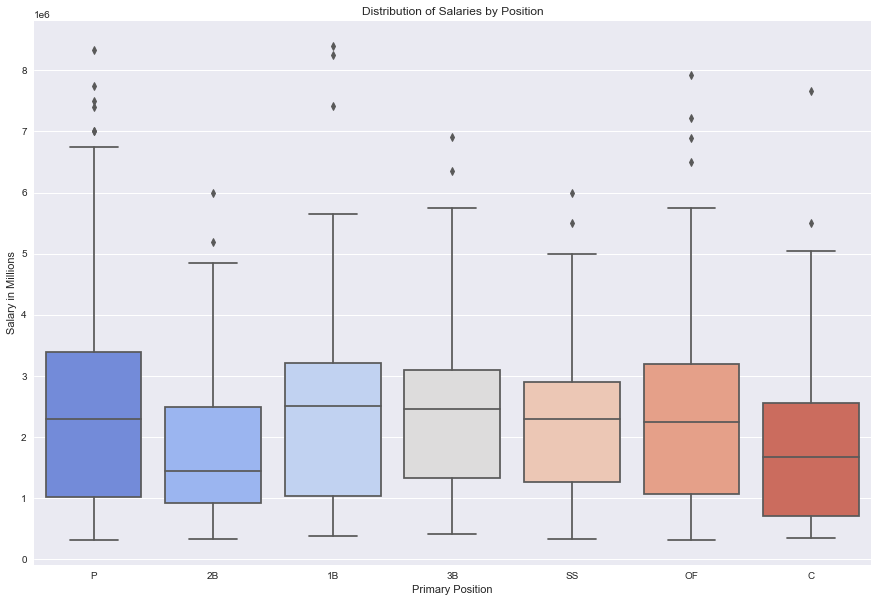

In [7]:
fig, axes = plt.subplots(figsize = (15,10))
sns.boxplot(x = 'prim_pos', y = 'salary', data = df, palette='coolwarm')

axes.set_ylabel('Salary in Millions')
axes.set_xlabel('Primary Position')
axes.set_title('Distribution of Salaries by Position')

plt.savefig('PNG/sal_primpos.png')

# 
In the two graphs below, you can see:
    
    a) The count of left handed batters is far smaller than the count of right handed batters
    b) The average salary is higher for a left handed batter

Why is that the case?

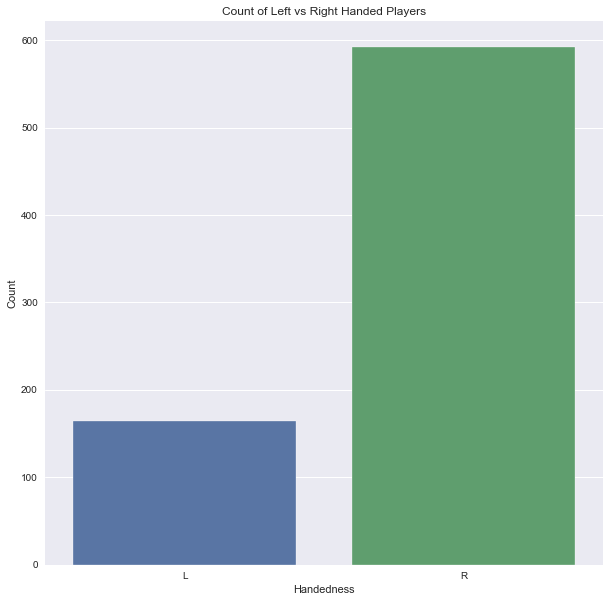

In [8]:

fig, axes = plt.subplots(figsize = (10,10))


sns.countplot(x= 'throws', data = df)

axes.set_ylabel('Count')
axes.set_xlabel('Handedness')
axes.set_title('Count of Left vs Right Handed Players')


plt.savefig('PNG/right_left_sal.png')

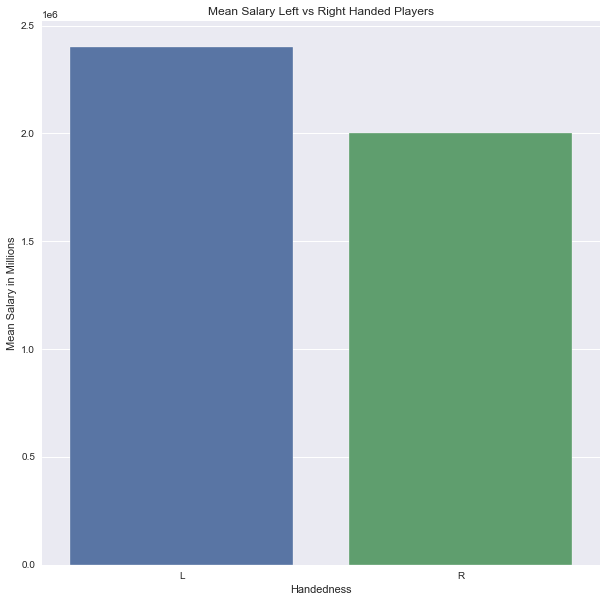

In [9]:
x = df.groupby('throws').salary.median().reset_index()


fig, axes = plt.subplots(figsize = (10,10))

sns.barplot(x= 'throws',y = 'salary', data = x)


axes.set_ylabel('Mean Salary in Millions')
axes.set_xlabel('Handedness')
axes.set_title('Mean Salary Left vs Right Handed Players')



plt.savefig('PNG/right_left_meansal.png', dpi = 150)


# The convention in baseball is that a pitcher has an advantage when thowing against someone who throws with the same hand.

In plainer terms, a lefty pitcher has an advantage against a left handed batter. The same is true with right handed pitchers. 

The higher average can be attributed to two things:

    a) the lack of sampling of left handed hitters shows bias in the data
    b) the rarity of left handed hitters and the prevalence of right handed pitchers make them a more precious commodity

In [10]:
df['throws'].value_counts()

R    592
L    165
Name: throws, dtype: int64

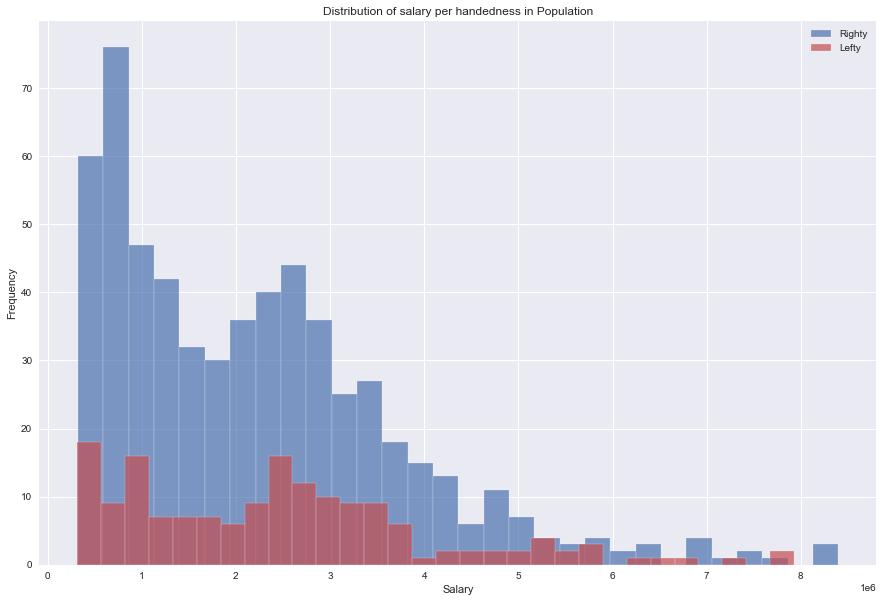

In [12]:
fig, ax = plt.subplots(figsize = (15,10))

df.salary[df.throws_R == 1].plot(kind = 'hist', bins = 30, alpha = 0.7, label = "Righty")
df.salary[df.throws_R == 0].plot(kind = 'hist', bins = 30, alpha = 0.7, label = "Lefty", color = 'r')
plt.legend()
plt.title("Distribution of salary per handedness in Population")
plt.xlabel('Salary')
plt.savefig('PNG/hand_salary_dist.png', dpi = 150)

## Statistic Tests

In this section I will perform 3 tests on my data to make sure they have relevance to the question at hand. 

### Test 1: Two sample Proportion Z-test

Null hypothesis: Do right and left handed players have different incidents of high earners?

In [13]:
df.salary.mean()

2277870.6631439896

In [14]:
df.salary.std()

1559203.7809601966

In [15]:
df_left = df[df.throws == 'L']
df_right = df[df.throws == 'R']

In [16]:
df_high_left = df_left[df_left.salary    >=  1700000]
df_high_right = df_right[df_right.salary >=  1700000]

In [17]:
z, p = sms.proportion.proportions_ztest([len(df_high_left), len(df_high_right)], [len(df_left), len(df_right)])

print('The p-value is: ' + str(p) + '. So we fail to reject the null hypothesis.')

The p-value is: 0.11896405676013236. So we fail to reject the null hypothesis.


# 
We fail to reject the null hypothesis that there is no difference between left and right handed players in terms of large salaries

### Test 2: ANOVA

Null hypothesis: The means of the samples are equal

In [18]:
# why can we use ols in this case?
anova_prim_pos = ols('salary~prim_pos', data=df).fit()
anova_prim_pos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     3.283
Date:                Wed, 07 Oct 2020   Prob (F-statistic):            0.00340
Time:                        14:19:08   Log-Likelihood:                -11858.
No. Observations:                 757   AIC:                         2.373e+04
Df Residuals:                     750   BIC:                         2.376e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         2.5e+06   1.87e+05     13.342      0.000    2.13e+06    2.87e+06
prim_pos[T.2B] -6.516e+05   2.43e+05     -2.683      0.007   -1.13e+06   -1.75e+05
prim_pos[T.3B]  8.658e+04   3.03e+05      0.286      0.775   -5.09e+05    6.82e+05
prim_pos[T.C]  -6.548e+05   2.58e+05     -2.538      0.011   -1.16e+06   -1.48e+05
prim_pos[T.OF] -1.939e+05   2.24e+05     -0.865      0.387   -6.34e+05    2.46e+05
prim_pos[T.P]  -6.462e+04   2.09e+05     -0.309      0.757   -4.75e+05    3.46e+05
prim_pos[T.SS] -2.359e+05   3.19e+05     -0.741      0.459   -8.61e+05    3.89e+05
==============================================================================
Omnibus:                      124.970   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.244
Skew:                           1.071   Prob(JB):                     8.95e-44
Kurtosis:                       4.302   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
stats.f_oneway(df['salary'][df['prim_pos'] == 'P'],
                df['salary'][df['prim_pos'] == 'C'], 
                df['salary'][df['prim_pos'] == '1B'],
                df['salary'][df['prim_pos'] == '2B'],
                df['salary'][df['prim_pos'] == '3B'],
                df['salary'][df['prim_pos'] == 'SS'],
                df['salary'][df['prim_pos'] == 'OF'],
                )

F_onewayResult(statistic=3.2830445373266963, pvalue=0.0034034193107985947)

# 
The low p-value shows that the means of the samples are equal. They probably came from the same distribution.

## Test 3: Two Sample T-Test

Tests whether the means of two independent samples are significantly different.

Assumptions

    Observations in each sample are independent and identically distributed
    Observations in each sample are normally distributed.
    Observations in each sample have the same variance.
    
Interpretation

    H0: the means of the samples are equal.
    H1: the means of the samples are unequal.

In [31]:
stat, p = ttest_ind(df.salary[df.birthCountry_USA == 1], df.salary[df['birthCountry_P.R.'] == 1])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=1.206, p=0.228
Probably the same distribution


In [32]:
stats.ttest_ind(df.salary[df.birthCountry_USA == 1], df.salary[df['birthCountry_D.R.'] == 1])

Ttest_indResult(statistic=0.4086886132566688, pvalue=0.6829093121543901)

In [33]:
stats.ttest_ind(df.salary[df['birthCountry_P.R.'] == 1], df.salary[df['birthCountry_D.R.'] == 1])

Ttest_indResult(statistic=-1.111528638560003, pvalue=0.26967021300498945)

In [34]:
stats.ttest_ind(df.salary[df.throws == 'L'], df.salary[df.throws == 'R'])

Ttest_indResult(statistic=1.883279970343274, pvalue=0.060046598098764295)

## Test 4: One Sample Z-Test for Means



In [36]:
kelevin = df.salary[df['birthCountry_D.R.'] == 1].sample(n = 100, replace = True)

# null hypothesis is that there is no correlation between being Dominican and getting a higher salary

x = kelevin.mean()
mu = df['salary'].mean()
s = df['salary'].std()
n = 100
z =  (x - mu)/(s / np.sqrt(n))
p = 1 - stats.norm.cdf(z)
#if p < alpha  # Reject Null Hypothesis
#if p > alpha  # Failed to reject Null Hypothesis
p

0.572631797992525

We fail to reject the null hypothesis

## Visualizations

Text(0.5, 1.0, 'Distribution of Salary (Natural Log)')

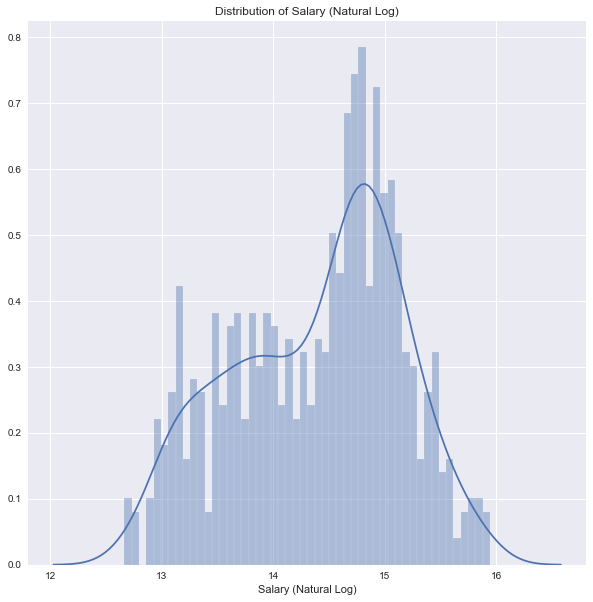

In [38]:
fig, axes = plt.subplots(figsize = (10,10))
sns.distplot(df.salary_log, bins = 50)


axes.set_xlabel('Salary (Natural Log)')
axes.set_title('Distribution of Salary (Natural Log)')



#plt.savefig('PNG/sal_dsit.png', dpi = 150)


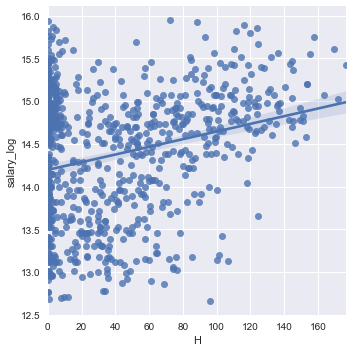

In [40]:

#fig, axes = plt.subplots(figsize = (12,10))
sns.lmplot(x='H',y='salary_log',data=df)




#plt.savefig('PNG/sal_regress.png', dpi = 150)

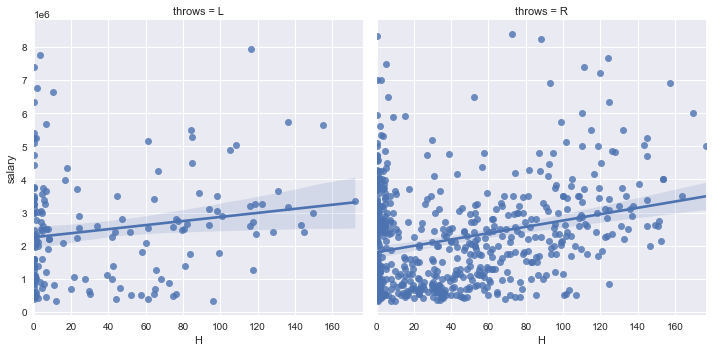

In [41]:
sns.lmplot(x='H',y='salary',data=df,col='throws')